EDA for Fraud Data

***Data cleaning***

In [1]:
import sys
import os
import pandas as pd

# 1. Load your CSV normally
df = pd.read_csv(
    r"E:\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-5_6\data\raw\Fraud_Data.csv"
)

# 2. Add project root to Python path
project_root = os.path.abspath("..")
sys.path.append(project_root)

In [3]:
from src.eda import FraudDataCleaner

In [8]:
cleaner = FraudDataCleaner(df)

clean_df = (
    cleaner
    .handle_missing(numeric_strategy="median")
    .remove_duplicates()
    .correct_dtypes()
    .get_clean_data()
)

clean_df.head()
folder =r"E:\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-5_6\data\raw"
file_path = os.path.join(folder, "cleaned.csv")

# 3. Save the DataFrame
clean_df.to_csv(file_path, index=False)

Exploratory Data Analysis (EDA)

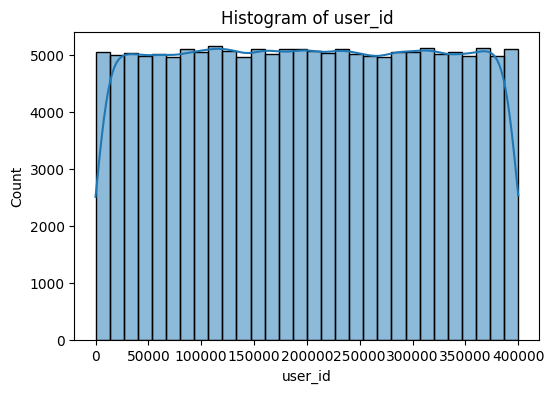

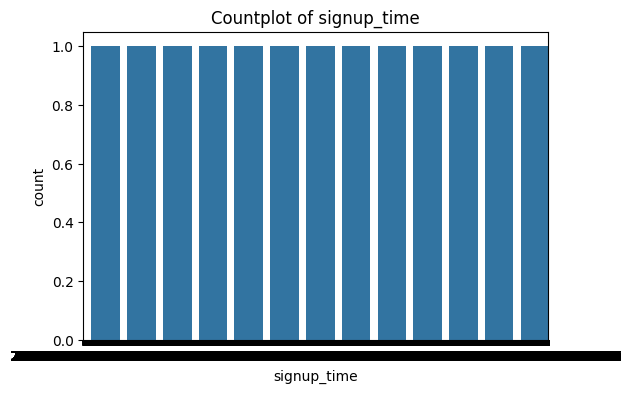

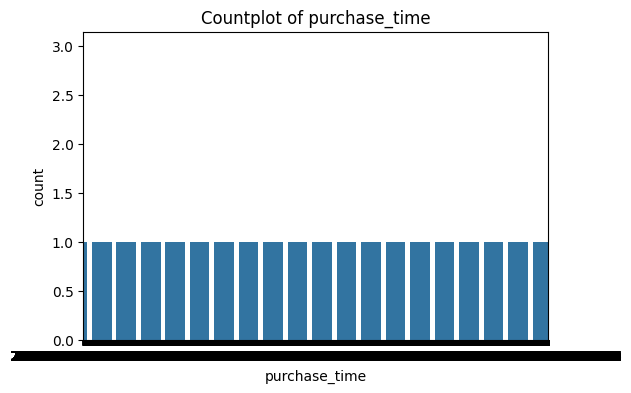

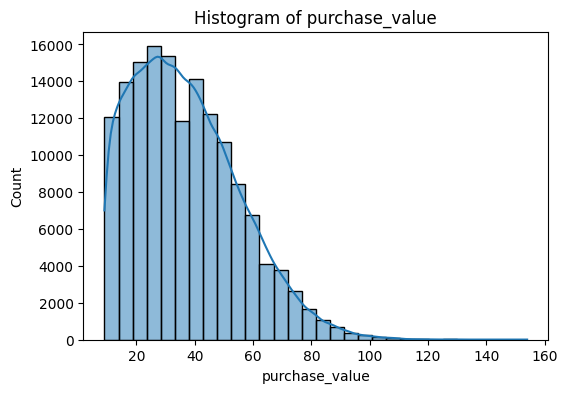

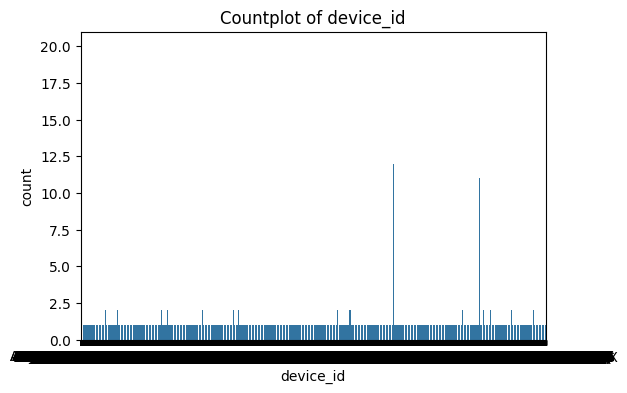

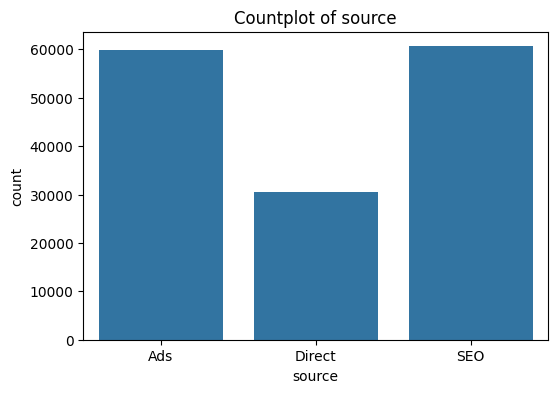

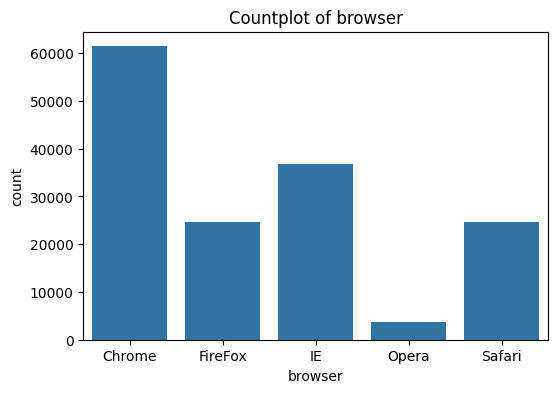

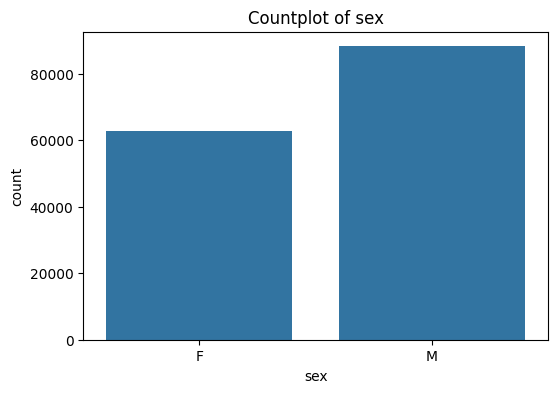

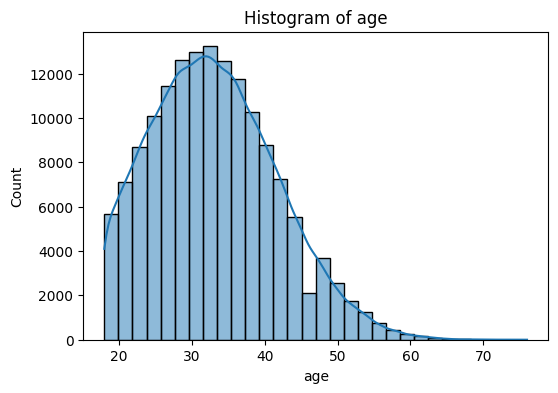

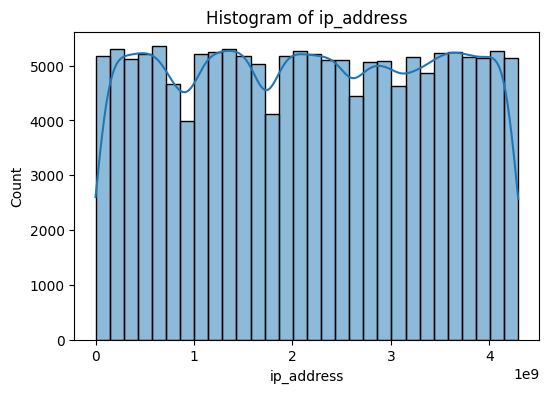

In [5]:
from src.eda_eda import EDA
   
eda = EDA(clean_df)
# Univariate analysis
eda.univariate_analysis()

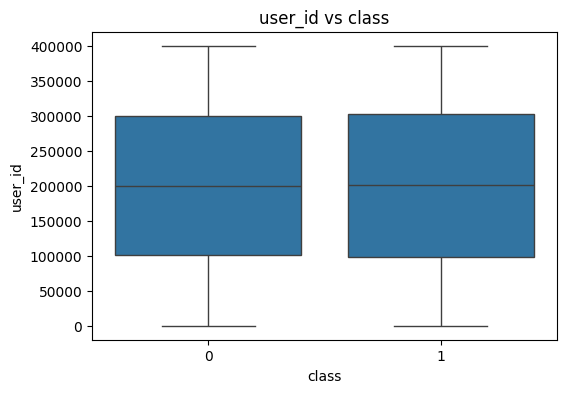

e:\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-5_6\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


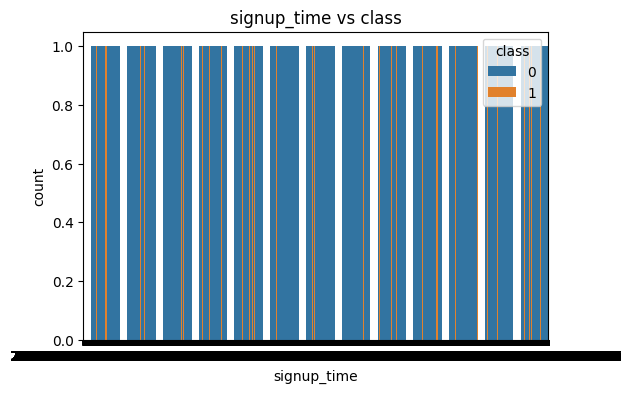

e:\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-5_6\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


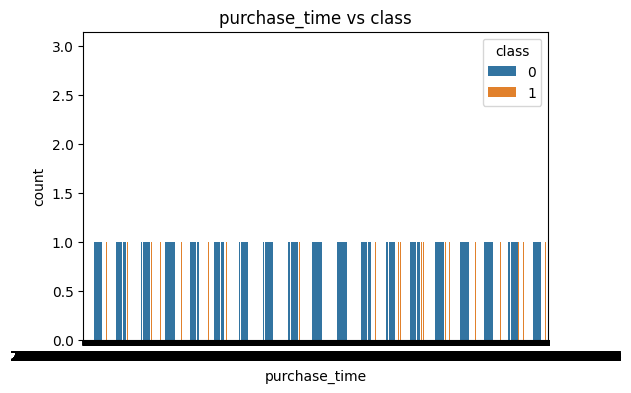

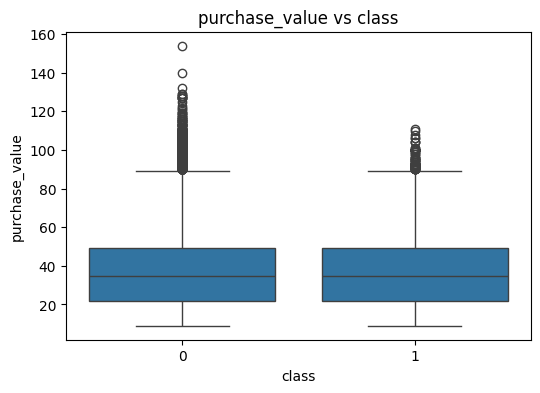

e:\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-5_6\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


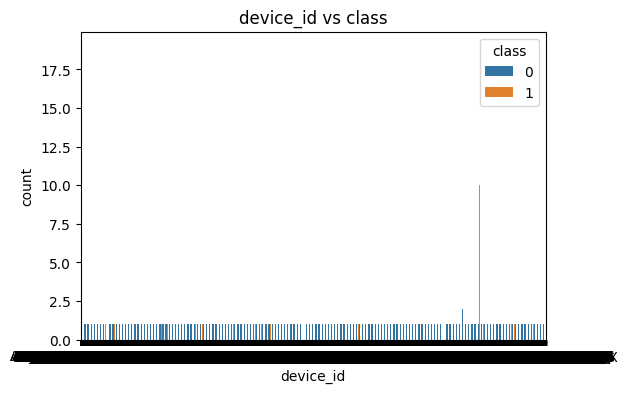

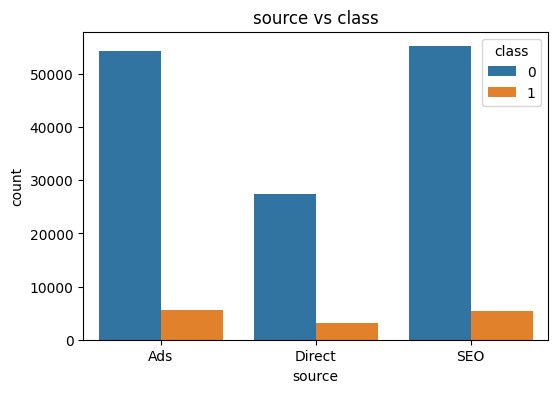

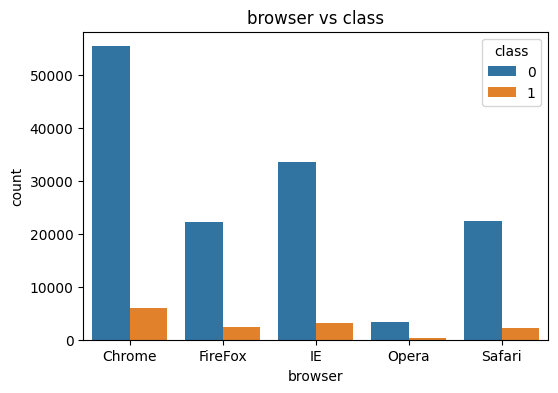

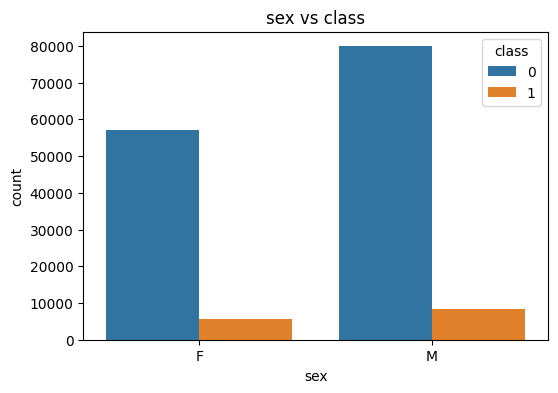

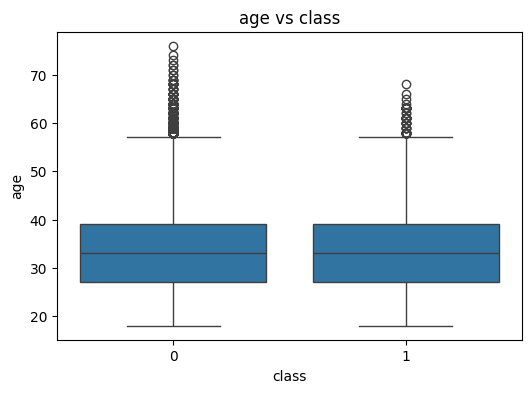

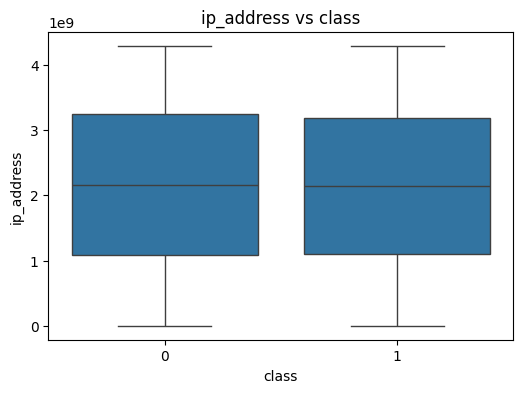

In [7]:
 # Bivariate analysis
eda.bivariate_analysis()

Class Distribution for class:
 class
0    136961
1     14151
Name: count, dtype: int64


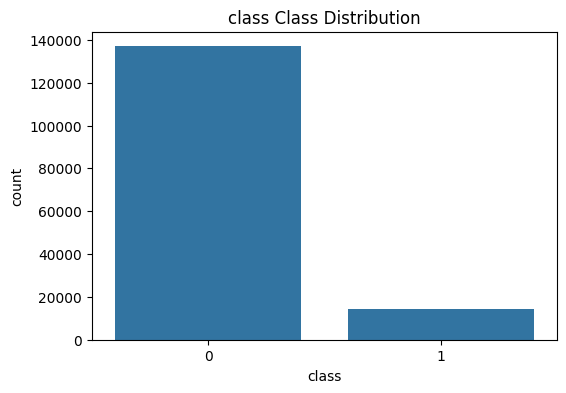

In [8]:
# Class distribution
eda.class_distribution()

***Geolocation Integration***

In [11]:
import pandas as pd
from src.geo_locator import GeoLocator

# Load datasets
fraud_df = pd.read_csv(r"E:\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-5_6\data\raw\cleaned.csv")
geo_df = pd.read_csv(r"E:\Improved-detection-of-fraud-cases-for-e-commerce-and-bank-transactions-week-5_6\data\raw\IpAddress_to_Country.csv")

# Initialize geolocator
geo = GeoLocator(fraud_df, geo_df, ip_col="ip_address")

# Convert IPs
fraud_df_fixed = geo.convert_ip_to_int()

# Merge with country info
fraud_with_country = geo.merge_with_geolocation()

# Fraud patterns by country
fraud_country_stats = geo.fraud_summary_by_country(target_col="class")

fraud_country_stats.head()


country
United States     5551
Unknown           1883
China             1043
Japan              715
United Kingdom     477
dtype: int64